In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('../dataset/a10.csv')
print(data.head())
print('\nData Types: ')
print(data.dtypes)

         date     value
0  1991-07-01  3.526591
1  1991-08-01  3.180891
2  1991-09-01  3.252221
3  1991-10-01  3.611003
4  1991-11-01  3.565869

Data Types: 
date      object
value    float64
dtype: object


In [3]:
# convert from dtype: object to time series, date as index
from datetime import datetime
con = data['date']
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1991-07-01', '1991-08-01', '1991-09-01', '1991-10-01',
               '1991-11-01', '1991-12-01', '1992-01-01', '1992-02-01',
               '1992-03-01', '1992-04-01',
               ...
               '2007-09-01', '2007-10-01', '2007-11-01', '2007-12-01',
               '2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01'],
              dtype='datetime64[ns]', name='date', length=204, freq=None)

In [4]:
#convert to time series
ts = data['value']
ts.head(10)

date
1991-07-01    3.526591
1991-08-01    3.180891
1991-09-01    3.252221
1991-10-01    3.611003
1991-11-01    3.565869
1991-12-01    4.306371
1992-01-01    5.088335
1992-02-01    2.814520
1992-03-01    2.985811
1992-04-01    3.204780
Name: value, dtype: float64

c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


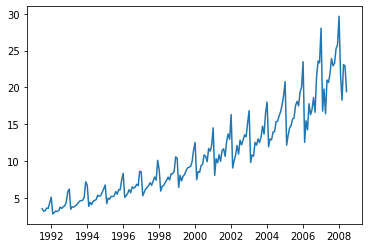

In [5]:
# Stationarity là một khái niệm rất quan trọng trong Time Seires Analysis. Để áp
# dụng một time series model, điều quan trọng là Time Series đó phải là stationary; 
# nói cách khác tất cả các thuộc tính thống kê (mean, variance) phải không đổi
# theo thời gian. Điều này là bởi vì nếu dữ liệu có đặc điểm nhất định theo thời gian
#, điều quan trọng là đặc điểm này phải giống nhau trong tương lai để chúng ta 
# có thể dự báo được series.
# Trong thực tế chúng ta có thể giả định chuỗi thời gian là stationary nếu nó
# có các thuộc tính thống kê không đổi qua thời gian và các thuộc tính đó có thê là:
# - constant mean
# - constant variance
# - auto co-variance không phụ thuộc vào thời gian

# Chúng ta xem xét chuỗi thời gian sau:
plt.plot(ts)

In [6]:
# Rõ ràng chúng ta có thể thấy có một trend tăng và cả seasonal trong chuỗi thời gian này

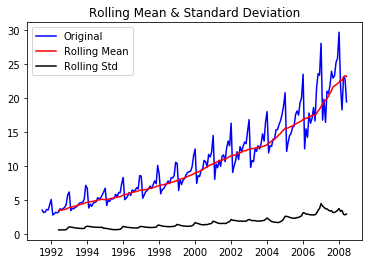

Results of Dickey-Fuller Test:
Test Statistic                   3.145186
p-value                          1.000000
#Lags Used                      15.000000
Number of Observations Used    188.000000
Critical Value (1%)             -3.465620
Critical Value (5%)             -2.877040
Critical Value (10%)            -2.575032
dtype: float64


In [7]:
# Hàm sau đây dùng để plot sự dịch chuyển của mean hoặc độ lệch chuẩn.

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean = timeseries.rolling(12).mean()
    #rolstd = pd.rolling_std(timeseries, window=12)
    rolstd = timeseries.rolling(12).std()
#Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(ts)

In [8]:
# Kết quả cho thấy series này không phải là stationary bởi vì:
# - mean tăng dần theo thời gian


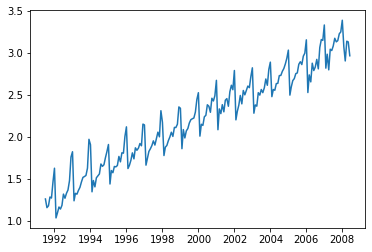

In [9]:
# Biển đổi về stationary
# Có 2 yếu tố chính làm cho time series non-stationay là:
# - Trend: non-constant mean
# - Seanonality
# Vì vậy ý tưởng cơ bản là chúng ta loại bỏ đi trend và seasonal để tạo ra series 
# stationary. Sau đó chúng ta có thể áp dụng các phương pháp dự báo cho stationary 
# series. Và cuối cùng chúng ta có thể chuyển đổi giá trị dự báo trở về giá trị gốc
# bằng các áp dụng trend và seasonality.

# Trend
# Bước đầu tiên để loại bỏ trend là sử dụng transformation, như chúng ta thấy 
# dữ liệu ví dụ là positive trend. Các transformation có thể là log, sqrt, căn 2, ...

ts_log = np.log(ts)
plt.plot(ts_log)

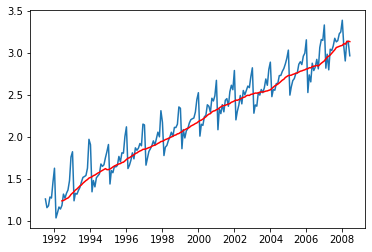

In [10]:
# Smoothing: làm mịn
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [11]:
# Bây giờ trừ đi rolling mean
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

date
1991-07-01         NaN
1991-08-01         NaN
1991-09-01         NaN
1991-10-01         NaN
1991-11-01         NaN
1991-12-01         NaN
1992-01-01         NaN
1992-02-01         NaN
1992-03-01         NaN
1992-04-01         NaN
1992-05-01         NaN
1992-06-01   -0.053199
Name: value, dtype: float64

In [12]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
1992-06-01   -0.053199
1992-07-01    0.075514
1992-08-01    0.017065
1992-09-01    0.064161
1992-10-01    0.095477
Name: value, dtype: float64

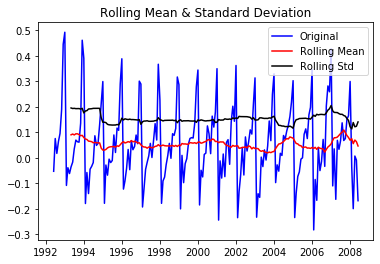

Results of Dickey-Fuller Test:
Test Statistic                  -4.026471
p-value                          0.001278
#Lags Used                      14.000000
Number of Observations Used    178.000000
Critical Value (1%)             -3.467632
Critical Value (5%)             -2.877918
Critical Value (10%)            -2.575501
dtype: float64


In [13]:
# Bây giờ kiểm tra lại tính stationary
test_stationarity(ts_log_moving_avg_diff)

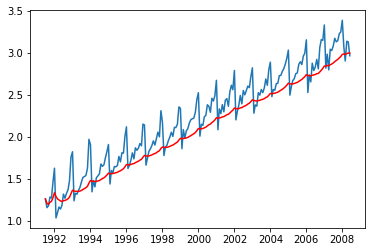

In [14]:
# Chúng ta có thể thấy:
# - Trend đã được loại bỏ

# Cách thử 2: Sử dụng moving average theo cấp số nhân
expwighted_avg = ts_log.ewm(halflife=12).mean()
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

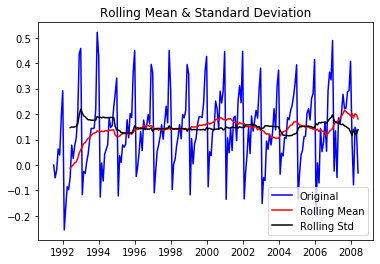

Results of Dickey-Fuller Test:
Test Statistic                  -4.291027
p-value                          0.000460
#Lags Used                      14.000000
Number of Observations Used    189.000000
Critical Value (1%)             -3.465431
Critical Value (5%)             -2.876957
Critical Value (10%)            -2.574988
dtype: float64


In [15]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

In [16]:
# Seasonality: (cùng với trend)
# Hầu hết các timeseries có trend cùng với seasonality.
# Có 2 phương pháp thông thường dùng để loại bỏ trend và seasonal là:
# - Diffrencing: Bằng cách lấy difference sử dụng time lag
# - Decomposition: model cả trend và seasonality, sau đó loại bỏ chúng

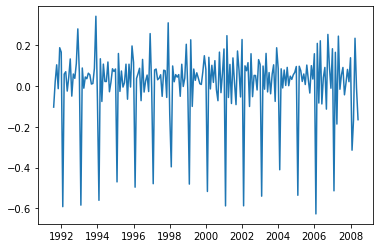

In [17]:
# Differencing:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

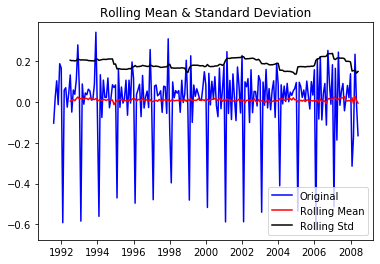

Results of Dickey-Fuller Test:
Test Statistic                  -4.519432
p-value                          0.000181
#Lags Used                      13.000000
Number of Observations Used    189.000000
Critical Value (1%)             -3.465431
Critical Value (5%)             -2.876957
Critical Value (10%)            -2.574988
dtype: float64


In [18]:
# kiểm tra
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

In [19]:
# Stationary vì mean và độ lệch chuẩn thay đổi ít theo thời gian

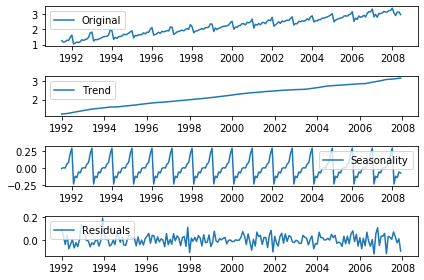

In [20]:
# Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

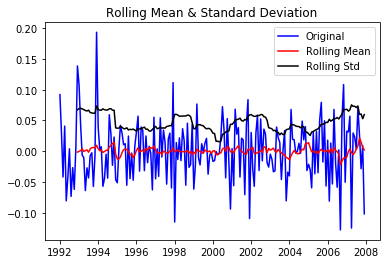

Results of Dickey-Fuller Test:
Test Statistic                -6.504444e+00
p-value                        1.140409e-08
#Lags Used                     1.200000e+01
Number of Observations Used    1.790000e+02
Critical Value (1%)           -3.467420e+00
Critical Value (5%)           -2.877826e+00
Critical Value (10%)          -2.575452e+00
dtype: float64


In [21]:
# Kiểm tra 
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [22]:
# Kết quả là stationary vì mean và độ lệch chuẩn thay đổi ít

In [23]:
# Forecasting a time series
# Sau khi làm cho Time series trở thành stationary, bây giờ ta tạo model dựa trên 
# time series sử dụng diffrencing bởi vì nó dễ dàng để thêm error, trend và seasonality
# trở lại giá trị dự đoán.


In [24]:
# Su dung SVR 

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error

In [25]:
X = ts_log_diff.index.values
X = X.reshape(X.shape[0], 1)
y = ts_log_diff.values

tmp = np.full(X.shape, X[0])
dt = (X - tmp)

X_days = dt.astype('timedelta64[D]')
X_days = X_days / np.timedelta64(1, 'D')



train_size = round(X_days.shape[0] - 1)
X_train = X_days[:train_size]
y_train = y[:train_size]
X_test = X_days[train_size:]
y_test = y[train_size:]

In [26]:
svr = GridSearchCV(SVR(kernel='rbf', gamma=0.1), cv=5, 
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3],
                               "gamma": np.logspace(-2,2,5),
                              "epsilon": [0.1, 0.2, 0,3, 0.4, 0.5, 0.6, 0.7]})

svr.fit(X_train, y_train)

print(svr.best_estimator_)
print(svr.best_score_)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
-0.0015462904021926924


c:\program files (x86)\microsoft visual studio\shared\python37_64\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0.5, 1.0, 'MSE: 0.0001')

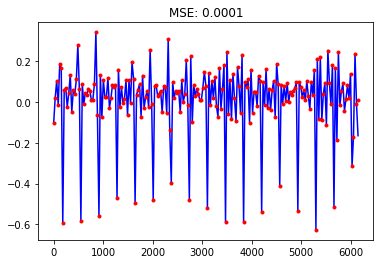

In [27]:
X_test = X_days
y_test = y

y_predict = svr.best_estimator_.predict(X_test)

plt.plot(X_days, y, color='blue')
plt.plot(X_test, y_predict,'.r');
plt.title("MSE: %.4f" %mean_squared_error(y_test, y_predict))

#y_predict = svr.best_estimator_.predict(X_train)
#plt.plot(X_train, y_predict, color='green');

In [28]:
    
#convert_back(y_predict, ts_log_diff.index)

In [29]:
# Bring back to the orignal scale
# - Đầu tiên lấy giá trị dự đoán và lưu vào một series.
# - Sau đó chuyển đổi differencing sang log

predictions_SVR_diff = pd.Series(index=ts_log_diff.index,data=y_predict, copy=True)
predictions_SVR_diff

date
1991-08-01   -0.103253
1991-09-01    0.022107
1991-10-01    0.104881
1991-11-01   -0.012354
1991-12-01    0.188918
                ...   
2008-02-01   -0.315271
2008-03-01   -0.170369
2008-04-01    0.235379
2008-05-01   -0.009090
2008-06-01    0.009254
Length: 203, dtype: float64

In [30]:
#cong tich luy
predictions_SVR_diff_cumsum = predictions_SVR_diff.cumsum()
print(predictions_SVR_diff_cumsum)

date
1991-08-01   -0.103253
1991-09-01   -0.081146
1991-10-01    0.023735
1991-11-01    0.011381
1991-12-01    0.200299
                ...   
2008-02-01    1.813419
2008-03-01    1.643050
2008-04-01    1.878429
2008-05-01    1.869338
2008-06-01    1.878592
Length: 203, dtype: float64


In [31]:
predictions_SVR_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_SVR_log = predictions_SVR_log.add(predictions_SVR_diff_cumsum, fill_value=0)
#predictions_SVR_log.head()

date
1991-07-01    1.260332
1991-08-01    1.260332
1991-09-01    1.260332
1991-10-01    1.260332
1991-11-01    1.260332
                ...   
2008-02-01    1.260332
2008-03-01    1.260332
2008-04-01    1.260332
2008-05-01    1.260332
2008-06-01    1.260332
Length: 204, dtype: float64


Text(0.5, 1.0, 'MSE: 4.9226')

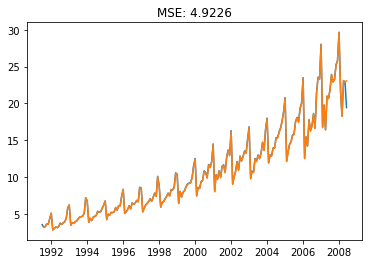

In [32]:
# Tiếp theo là tính giá trị từ log
plt.plot(ts)
predictions_SVR = np.exp(predictions_SVR_log)
predicted_ts = pd.Series(index=ts_log_diff.index,data=predictions_SVR, copy=True)
plt.plot(predicted_ts)
plt.title('MSE: %.4f' % mean_squared_error(predicted_ts, ts[0:203]))

Text(0.5, 1.0, 'MSE: 0.0173')

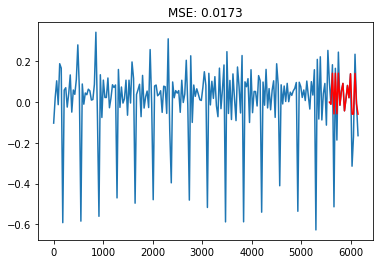

In [33]:

#plt.plot(X_days, y, color='red')
diff = 20

X_test_1 = X_days[-diff:].copy()
y_predict_1 = np.ndarray((diff,))
y_truth = y[-diff:]


for i in range(1, int(diff)):
    
    train_size = round(X_days.shape[0] + i - 10)
    X_train_1 = X_days[:train_size].copy()
    y_train_1 = y[:train_size].copy()
    x = X_test_1[i:i+1].copy()

    svr = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=0)
    y_predict_1[i] = svr.fit(X_train_1, y_train_1).predict(x)
    
plt.plot(X_days, y)
plt.plot(X_test_1, y_predict_1, '-r')
plt.title("MSE: %.4f" %mean_squared_error(y_predict_1, y_truth))
    